In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

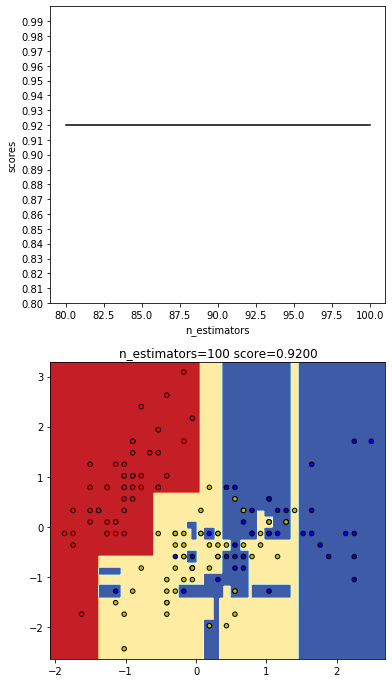

In [2]:
pair = [0, 1]
RANDOM_SEED = 13
plot_step = 0.02

# load iris dataset
iris = load_iris()

X_train = iris.data[:, pair]
y_train = iris.target

# Shuffle
idx = np.arange(X_train.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

# Standardize
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

# Plot
plt.figure(figsize=(6, 6 * 2))

x_min = X_train[:, 0].min() - .2
x_max = X_train[:, 0].max() + .2
y_min = X_train[:, 1].min() - .2
y_max = X_train[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

n_estimators = np.arange(80, 101, 2, dtype=np.int)
scores = np.zeros(n_estimators.shape[0])
model = None

for i, n_est in enumerate(n_estimators):
    # Train and score
    model = GradientBoostingClassifier(n_estimators=n_est, learning_rate=0.1, loss='deviance')
    model.fit(X_train, y_train)
    scores[i] = model.score(X_train, y_train)
    
#     print('loss.K =', model.loss_.K)
#     for ests in model.estimators_:
#         for estimator in ests:
#             n_nodes = estimator.tree_.node_count
#             children_left = estimator.tree_.children_left
#             children_right = estimator.tree_.children_right
#             feature = estimator.tree_.feature
#             threshold = estimator.tree_.threshold


#             # The tree structure can be traversed to compute various properties such
#             # as the depth of each node and whether or not it is a leaf.
#             node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
#             is_leaves = np.zeros(shape=n_nodes, dtype=bool)
#             stack = [(0, -1)]  # seed is the root node id and its parent depth
#             while len(stack) > 0:
#                 node_id, parent_depth = stack.pop()
#                 node_depth[node_id] = parent_depth + 1

#                 # If we have a test node
#                 if (children_left[node_id] != children_right[node_id]):
#                     stack.append((children_left[node_id], parent_depth + 1))
#                     stack.append((children_right[node_id], parent_depth + 1))
#                 else:
#                     is_leaves[node_id] = True

#             print("The binary tree structure has %s nodes and has the following tree structure:" % n_nodes)
#             for i in range(n_nodes):
#                 if is_leaves[i]:
#                     print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
#                 else:
#                     print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to node %s."
#                           % (node_depth[i] * "\t",
#                              i,
#                              children_left[i],
#                              feature[i],
#                              threshold[i],
#                              children_right[i],
#                              ))

plt.subplot(2, 1, 1, ylim=(0.8, 1.), yticks=np.arange(0.8, 1., 0.01), xlabel='n_estimators', ylabel='scores')
plt.plot(n_estimators, scores, 'k-')

plt.subplot(2, 1, 2, title='n_estimators=%d score=%.4f' % (n_estimators[-1], scores[-1]))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)

plt.show()